# matplotlib Assignment

Problem 1:
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
from matplotlib import pyplot as plt
from scipy import optimize
import numpy as np

In [2]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) 
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) 

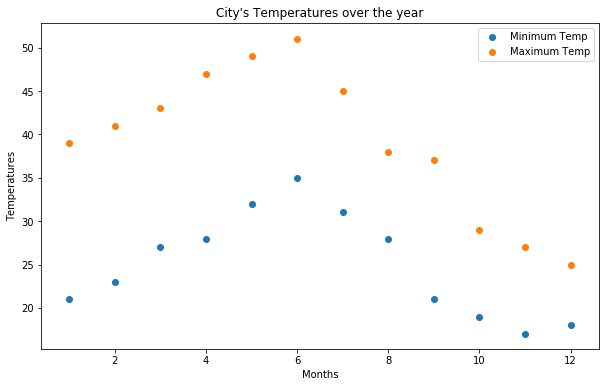

In [3]:
months = np.arange(1,len(Max_temp)+1)
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)
axes.scatter(months, Min_temp, label = "Minimum Temp")
axes.scatter(months, Max_temp, label = "Maximum Temp")
axes.set_xlabel('Months')
axes.set_ylabel('Temperatures')
axes.set_title("City's Temperatures over the year")
plt.legend()
plt.show()

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [5]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max_temp)
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min_temp)
print(f"res_max:\n{res_max},\ncov_max:\n{cov_max},\n\n\nres_min:\n{res_min},\ncov_min:\n{cov_min}")

res_max:
[ 39.25       -11.01878021   0.97111096],
cov_max:
[[ 7.38600934e-01 -5.32715571e-09 -1.27644772e-18]
 [-5.32715571e-09  1.47720191e+00  3.53954551e-10]
 [-1.27644772e-18  3.53954551e-10  4.43788472e-02]],


res_min:
[25.          7.86539575  6.48952563],
cov_min:
[[1.92715722e-01 1.94722183e-09 3.47876127e-10]
 [1.94722183e-09 3.85431443e-01 1.91982798e-09]
 [3.47876127e-10 1.91982798e-09 2.27252555e-02]]


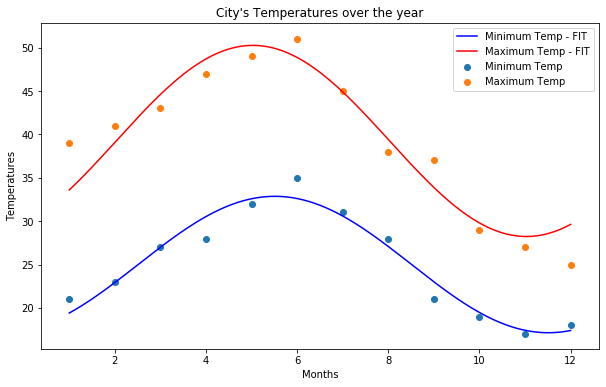

In [6]:
months = np.arange(1,len(Max_temp)+1)
days = np.linspace(1,12,365)
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)
axes.scatter(months, Min_temp, label = "Minimum Temp")
axes.plot(days, yearly_temps(days, *res_min), 'b-', label = "Minimum Temp - FIT" )
axes.scatter(months, Max_temp, label = "Maximum Temp")
axes.plot(days, yearly_temps(days, *res_max), 'r-', label = "Maximum Temp - FIT")
axes.set_xlabel('Months')
axes.set_ylabel('Temperatures')
axes.set_title("City's Temperatures over the year")
plt.legend()
plt.show()